In [43]:
import glob
invasive_dirs = [
    r'C:\Users\shaif\Downloads\Compressed\Labeled Baylor 8-30-23\Labeled Baylor 8-30-23\Zebra Ped 1a Image1a\D-Hinge',
    r'C:\Users\shaif\Downloads\Compressed\Labeled Baylor 8-30-23\Labeled Baylor 8-30-23\Zebra Ped 1 Image1a\Pedi'
]

invasive_subdirs = []

# Collect subdirectories in the invasive category
for invasive_dir in invasive_dirs:
    invasive_subdirs.extend(glob.glob(invasive_dir))
    
y1 = []
x = invasive_subdirs
# Read subdirectories for each directory in x
for directory in x:
    subdirectories = glob.glob(directory + r'\*')
    y1.extend(subdirectories)
    
y1

['C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_024',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_037',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_040',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_044',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_048',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_105',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Baylor 8-30-23\\Labeled Baylor 8-30-23\\Zebra Ped 1a Image1a\\D-Hinge\\Object_145',
 'C:\\Users\\shaif\\Downloads\\Compressed\\Labeled Bayl

In [1]:
import os
import tensorflow as tf
from PIL import Image
import numpy as np


    
# Define the folder location
folder_location = r"C:\Users\shaif\Downloads\Compressed\Labeled Baylor 8-30-23\Labeled Baylor 8-30-23\Zebra Ped 1a Image1a\D-Hinge"

folders = os.listdir(folder_location)

# Define the desired image size
target_size = (40, 40)

# Initialize an empty list to store the processed images
processed_images = []

# Iterate through each folder
for folder in folders:
    # Construct the folder path
    folder_path = os.path.join(folder_location, folder)
    
    # List all images in the folder
    images = os.listdir(folder_path)
    
    # Iterate through each image
    for image_name in images:
        # Construct the image path
        image_path = os.path.join(folder_path, image_name)
        
        # Open the image using PIL
        image = Image.open(image_path)
        
        # Resize the image using TensorFlow
        resized_image = tf.image.resize_with_crop_or_pad(
            tf.keras.preprocessing.image.img_to_array(image),
            target_size[0],
            target_size[1]
        )
        
        # Normalize the data for deep learning
        normalized_image = (resized_image - 127.5) / 127.5
        
        # Append the processed image to the list
        processed_images.append(normalized_image)

# Convert the list of images to a NumPy array
processed_images = np.array(processed_images)
processed_images.shape

(449, 40, 40, 3)

In [47]:

import os
import numpy as np
import tensorflow as tf
from PIL import Image

def preprocess_images(y1, label_num, target_size=(40, 40)):
    # List to store image files
    image_files = []
    # List to store labels
    labels = []

    # Retrieve image files and create labels for each directory in y1
    for directory in y1:
        for root, dirs, files in os.walk(directory):
            for file in files:
                # Check if the file has an image extension
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    # Add the file path to the image_files list
                    image_files.append(os.path.join(root, file))
                    # Add the label to the labels list
                    

    # List to store preprocessed images
    images = []

    # Preprocess each image
    for file in image_files:
        try:
            # Read the image using PIL
            image = Image.open(file)
            # Resize the image using tf.image.resize_with_crop_or_pad()
            image = tf.image.resize_with_crop_or_pad(
                tf.keras.preprocessing.image.img_to_array(image),
                target_size[0],
                target_size[1]
            )
            # Normalize the image pixels for ML training
            image = image / 255.0
            # Add the preprocessed image to the images list
            images.append(image)
            labels.append(label_num)
        except Exception as e:
            print(f"Error processing image: {file}. Skipping...")
            continue

    # Convert the images and labels lists to numpy arrays
    images = np.array(images)

    return images


X0 = preprocess_images(y1, label_num = 0)
np.shape(X0)

(3886, 40, 40, 3)

In [6]:
from tensorflow.keras.models import load_model
# Define the path to the model file
model_path = r'E:\single_image_model.h5'
# Load the model with custom_objects argument
model = load_model(model_path)
# Print the model summary
#model.summary()

In [7]:
x = model.predict(processed_images)
res = np.argmax(x,axis = 1)
count_0 = 0
count_1 = 0
count_2 = 0

# Count the numbers
for i in res:
    if(i==0):
        count_0  = count_0  + 1
    elif(i==1):
        count_1  = count_1  + 1
    else:
        count_2  = count_2  + 1

# Print the counts
print("Count of 0:", count_0)
print("Count of 1:", count_1)
print("Count of 2:", count_2)

Count of 0: 198
Count of 1: 251
Count of 2: 0


In [54]:
np.shape(x)

(3886, 3)

In [77]:
import os

def count_images_in_subdirs(folder_location):
    subdir_image_counts = []
    
    for subdir in os.listdir(folder_location):
        subdir_path = os.path.join(folder_location, subdir)
        
        if os.path.isdir(subdir_path):
            image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))])
            subdir_image_counts.append(image_count)
    
    return subdir_image_counts

image_counts = count_images_in_subdirs(folder_location)


In [79]:
x = model.predict(processed_images)
result = []
res_detailed = []
y = 0
for i in image_counts:
    larvae = x[y:y+i]
    y = i+y
    average = np.mean(larvae, axis=0)
    #print((average))
    pred = np.argmax(average)
    #print(pred)
    result.append(pred)
    res_detailed.append(average)


In [104]:
import os
import tensorflow as tf
from PIL import Image
import numpy as np

# Define the folder location
folder_location = r"C:\Users\shaif\Downloads\Compressed\68 Red Bud Isle Sample 19 Kayak Net 13 min\68 Red Bud Isle Sample 19 Kayak Net 13 min\68_59 Red Bud Isle Sample 19 Kayak Net 13 min5-27-2022 1_27PM Image1\Images_001"

folders = os.listdir(folder_location)

# Define the desired image size
target_size = (40, 40)

# Initialize an empty list to store the processed images
processed_images = []

# Iterate through each folder
for folder in folders:
    # Construct the folder path
    folder_path = os.path.join(folder_location, folder)
    
    # List all images in the folder
    images = os.listdir(folder_path)
    
    # Iterate through each image
    for image_name in images:
        # Construct the image path
        image_path = os.path.join(folder_path, image_name)
        
        # Open the image using PIL
        image = Image.open(image_path)
        
        # Resize the image using TensorFlow
        resized_image = tf.image.resize_with_crop_or_pad(
            tf.keras.preprocessing.image.img_to_array(image),
            target_size[0],
            target_size[1]
        )
        
        # Normalize the data for deep learning
        normalized_image = (resized_image - 127.5) / 127.5
        
        # Append the processed image to the list
        processed_images.append(normalized_image)

# Convert the list of images to a NumPy array
processed_images = np.array(processed_images)

import os

def count_images_in_subdirs(folder_location):
    subdir_image_counts = []
    
    for subdir in os.listdir(folder_location):
        subdir_path = os.path.join(folder_location, subdir)
        
        if os.path.isdir(subdir_path):
            image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))])
            subdir_image_counts.append(image_count)
    
    return subdir_image_counts

image_counts = count_images_in_subdirs(folder_location)


x = model.predict(processed_images)
result = []
res_detailed = []
y = 0
for i in image_counts:
    larvae = x[y:y+i]
    y = i+y
    average = np.mean(larvae, axis=0)
    #print((average))
    pred = np.argmax(average)
    #print(pred)
    result.append(pred)
    res_detailed.append(average)

count_of_ones = result.count(1)

print("Number of Total Organisms : ",len(result),"\n")

print("Number of Invasive : ", count_of_ones)

Number of Total Organisms :  2197 

Number of Invasive :  464


In [3]:
y = []

In [31]:
import os
import tensorflow as tf
from PIL import Image
import numpy as np


    
# Define the folder location
folder_location = r"C:\Users\shaif\Downloads\Compressed\68 Red Bud Isle Sample 19 Kayak Net 13 min\68 Red Bud Isle Sample 19 Kayak Net 13 min\68_59 Red Bud Isle Sample 19 Kayak Net 13 min5-27-2022 1_27PM Image3\Images_001"

folders = os.listdir(folder_location)

# Define the desired image size
target_size = (40, 40)

# Initialize an empty list to store the processed images
processed_images = []

# Iterate through each folder
for folder in folders:
    # Construct the folder path
    folder_path = os.path.join(folder_location, folder)
    
    # List all images in the folder
    images = os.listdir(folder_path)
    
    # Iterate through each image
    for image_name in images:
        # Construct the image path
        image_path = os.path.join(folder_path, image_name)
        
        # Open the image using PIL
        image = Image.open(image_path)
        
        # Resize the image using TensorFlow
        resized_image = tf.image.resize_with_crop_or_pad(
            tf.keras.preprocessing.image.img_to_array(image),
            target_size[0],
            target_size[1]
        )
        
        # Normalize the data for deep learning
        normalized_image = (resized_image - 127.5) / 127.5
        
        # Append the processed image to the list
        processed_images.append(normalized_image)

# Convert the list of images to a NumPy array
processed_images = np.array(processed_images)
processed_images.shape
x = model.predict(processed_images)
y.append(x)

In [33]:
np.shape(y)

(10,)

In [35]:
np.shape(result)

(463417, 3)

In [34]:
import numpy as np
result = np.vstack(y)

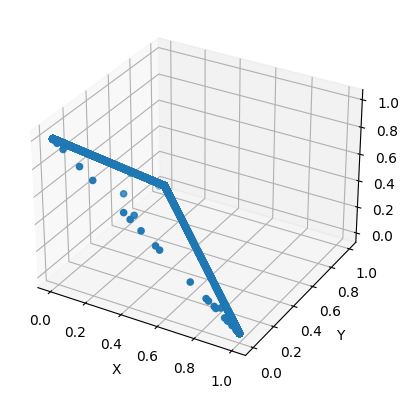

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming `result` is your array with shape (463417, 3)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x = result[:, 0]
y = result[:, 1]
z = result[:, 2]

# Scatter plot the points
ax.scatter(x, y, z)

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()
